## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset

In [2]:
df1=pd.read_csv('/content/penguins_size.csv')
df1.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [3]:
df1.shape

(344, 7)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Descriptive statistics on dataset

In [5]:
df1.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Check for missing values and dealing with them

In [6]:
df1.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df2=df1.copy()
df2['sex']=df2['sex'].fillna(df2['sex'].mode().iloc[0])
df2.culmen_length_mm=df2.culmen_length_mm.fillna(df2.culmen_length_mm.median())
df2.culmen_depth_mm=df2.culmen_depth_mm.fillna(df2.culmen_depth_mm.median())
df2.flipper_length_mm=df2.flipper_length_mm.fillna(df2.flipper_length_mm.median())
df2.body_mass_g=df2.body_mass_g.fillna(df2.body_mass_g.median())

In [8]:
df2.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
df2.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.30,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.90,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.20,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,MALE
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,MALE


## Visualizations

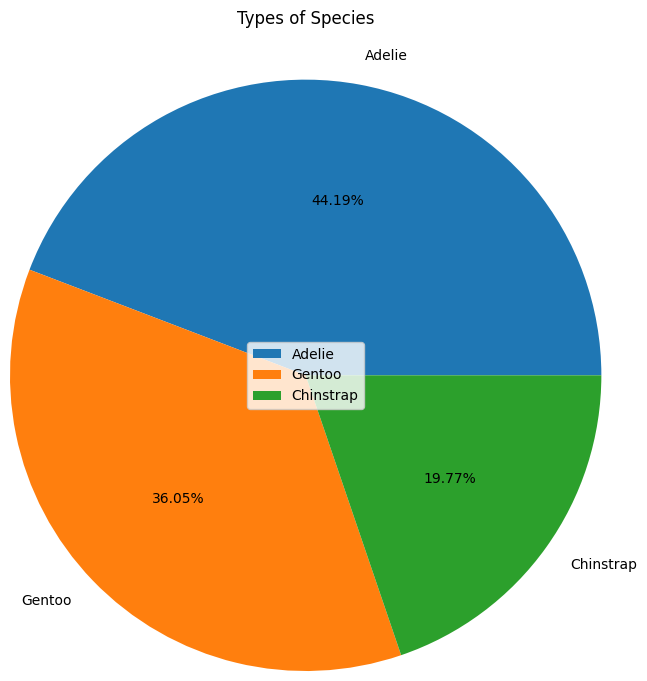

In [10]:
species_count=df2.species.value_counts()
plt.pie(species_count,autopct='%1.2f%%',labels=species_count.keys(),radius=2)
plt.legend(loc='center')
plt.title('Types of Species',pad=120)
plt.show()

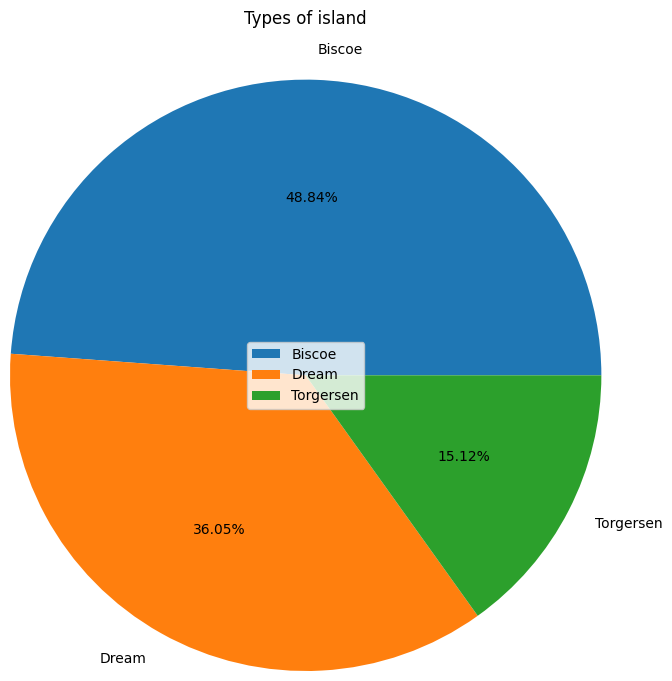

In [11]:
island_count=df2.island.value_counts()
plt.pie(island_count,autopct='%1.2f%%',labels=island_count.keys(),radius=2)
plt.legend(loc='center')
plt.title('Types of island',pad=120)
plt.show()

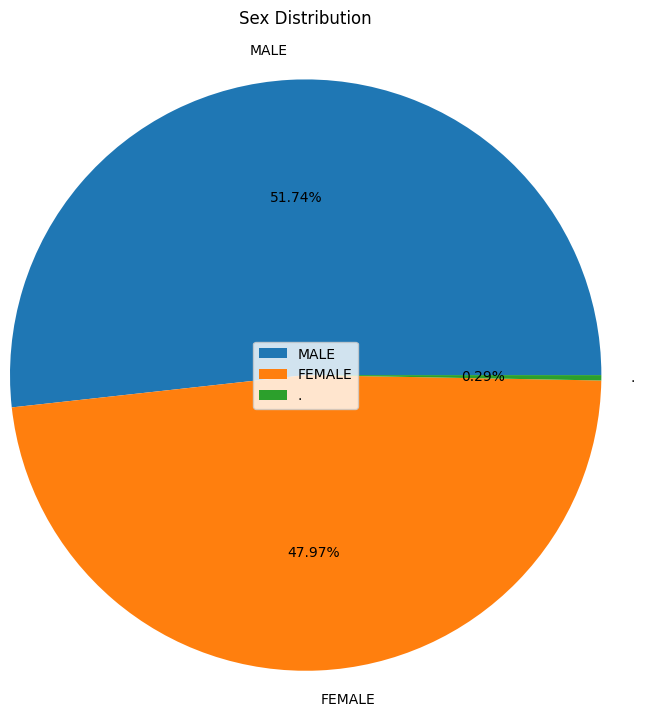

In [12]:
sex_count=df2.sex.value_counts()
plt.pie(sex_count,autopct='%1.2f%%',labels=sex_count.keys(),radius=2)
plt.legend(loc='center')
plt.title('Sex Distribution',pad=120)
plt.show()

### Cleaning Gender Column

In [13]:
sex_count=df2.sex.value_counts()
sex_count

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [14]:
replace_index=df2[df2.sex=='.'].index.values
df2['sex'][replace_index]=df2.sex.mode()

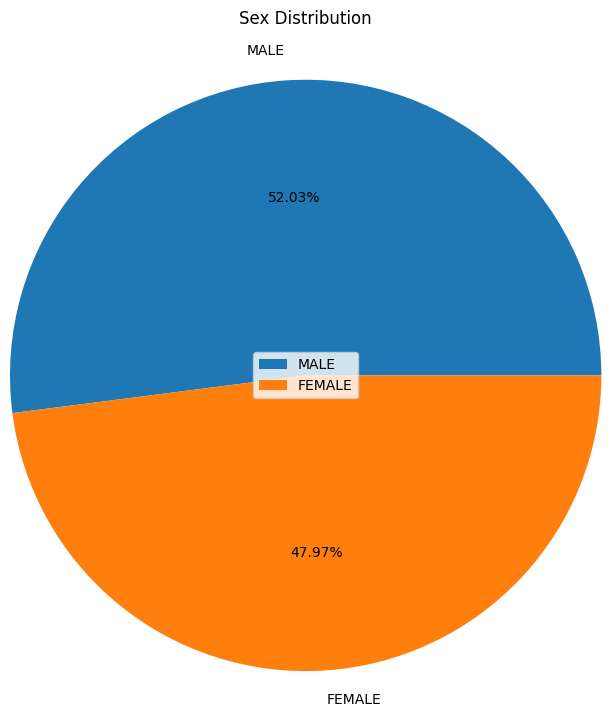

In [15]:
sex_count=df2.sex.value_counts()
plt.pie(sex_count,autopct='%1.2f%%',labels=sex_count.keys(),radius=2)
plt.legend(loc='center')
plt.title('Sex Distribution',pad=120)
plt.show()

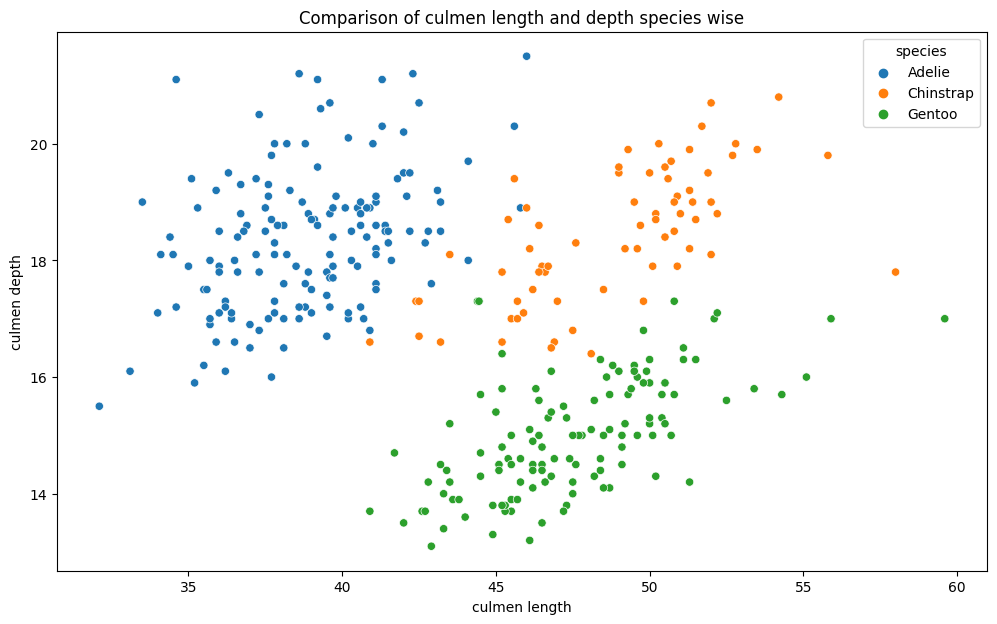

In [16]:
plt.rcParams['figure.figsize']=(12,7)
sns.scatterplot(x=df2.culmen_length_mm,y=df2.culmen_depth_mm,hue=df2.species)
plt.xlabel('culmen length')
plt.ylabel('culmen depth')
plt.title('Comparison of culmen length and depth species wise')
plt.show()

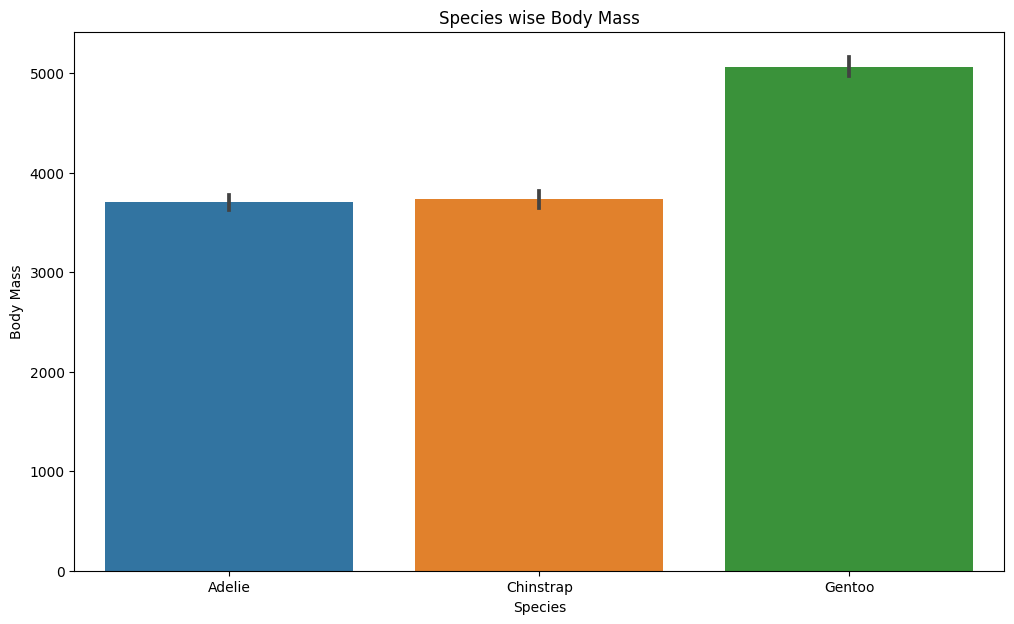

In [17]:
plt.rcParams['figure.figsize']=(12,7)
sns.barplot(x=df2.species,y=df2.body_mass_g)
plt.xlabel('Species')
plt.ylabel('Body Mass')
plt.title('Species wise Body Mass')
plt.show()

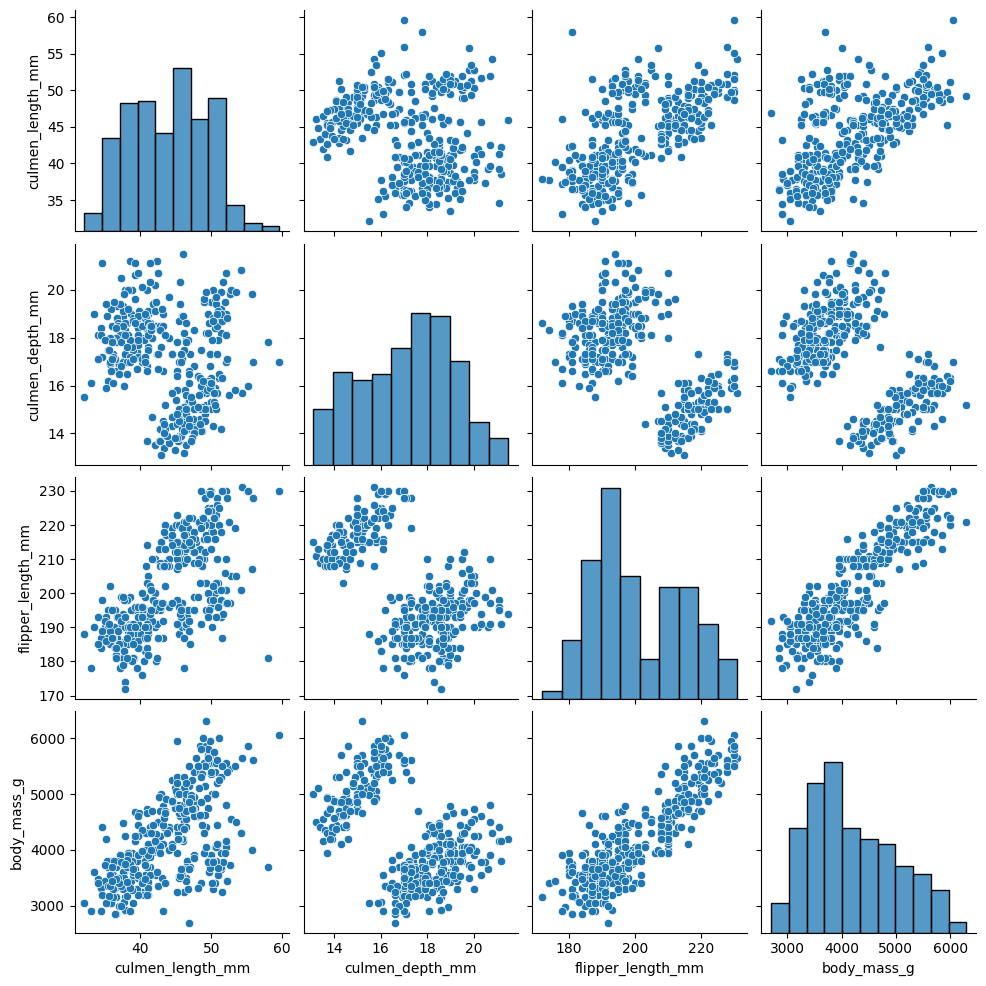

In [18]:
sns.pairplot(df2)
plt.show()

## Outlier Detection and replacement

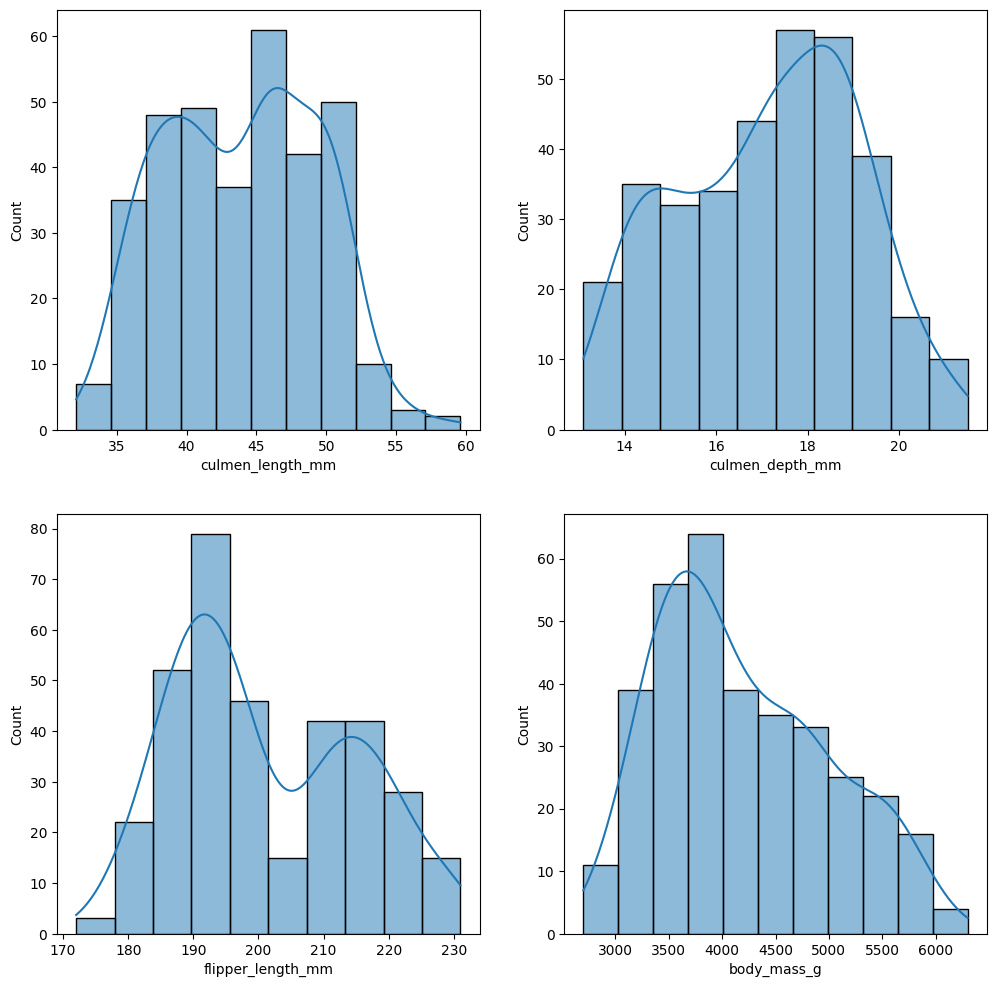

In [19]:
plt.rcParams['figure.figsize']=12,12
fig,axes=plt.subplots(2,2)
sns.histplot(df2['culmen_length_mm'],kde=True,ax=axes[0,0])
sns.histplot(df2['culmen_depth_mm'],kde=True,ax=axes[0,1])
sns.histplot(df2['flipper_length_mm'],kde=True,ax=axes[1,0])
sns.histplot(df2['body_mass_g'],kde=True,ax=axes[1,1])
plt.show()

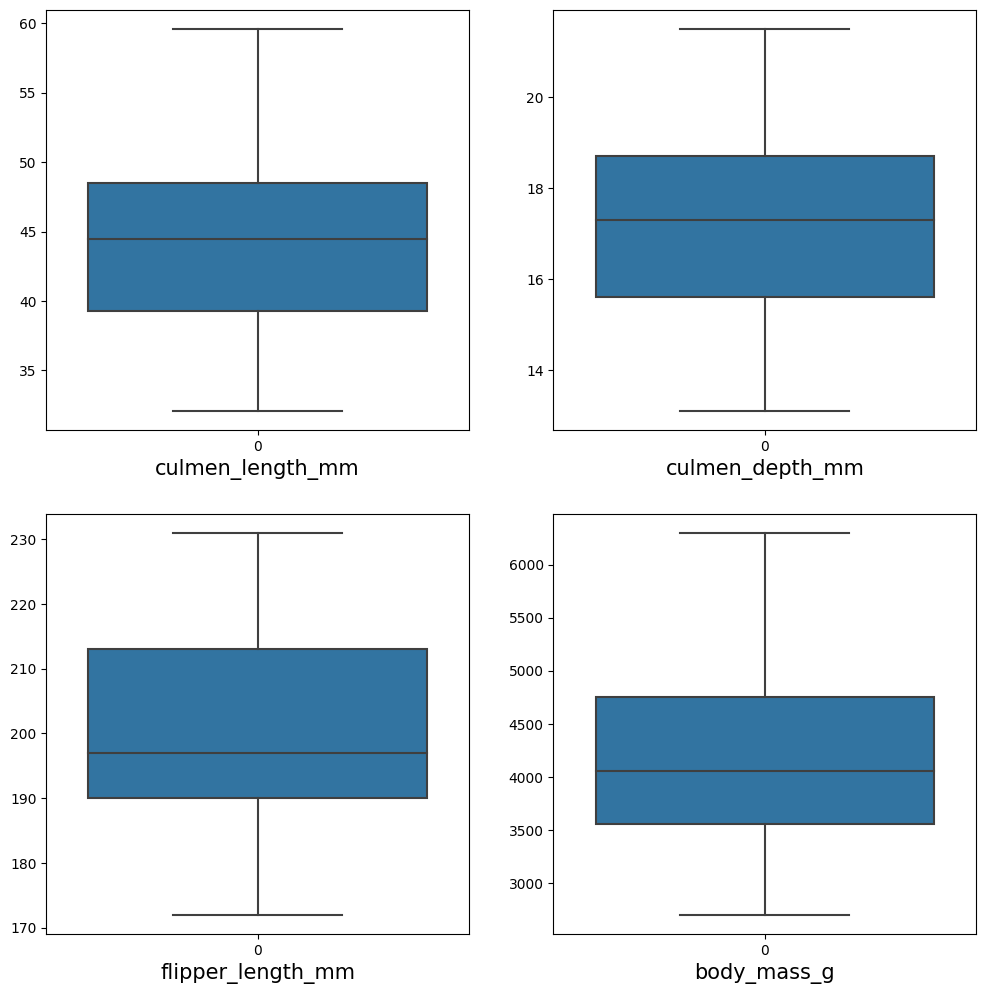

In [20]:
plt.rcParams['figure.figsize']=12,12
fig,axes=plt.subplots(2,2)
sns.boxplot(df2['culmen_length_mm'],ax=axes[0,0])
axes[0,0].set_xlabel('culmen_length_mm',fontsize=15)
sns.boxplot(df2['culmen_depth_mm'],ax=axes[0,1])
axes[0,1].set_xlabel('culmen_depth_mm',fontsize=15)
sns.boxplot(df2['flipper_length_mm'],ax=axes[1,0])
axes[1,0].set_xlabel('flipper_length_mm',fontsize=15)
sns.boxplot(df2['body_mass_g'],ax=axes[1,1])
axes[1,1].set_xlabel('body_mass_g',fontsize=15)
plt.show()

### No Outliers Detected

## Handling Categorical columns

In [21]:
df2.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.30,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.90,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.20,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,MALE
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,MALE


In [22]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
df3=df2.copy()
df3.species=ll.fit_transform(df3.species)
species_categorical=ll.inverse_transform([0,1,2])
species_dict=dict(enumerate(species_categorical))
species_dict

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

In [23]:
df3.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,0,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,0,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.30,20.6,190.0,3650.0,MALE
6,0,Torgersen,38.90,17.8,181.0,3625.0,FEMALE
7,0,Torgersen,39.20,19.6,195.0,4675.0,MALE
8,0,Torgersen,34.10,18.1,193.0,3475.0,MALE
9,0,Torgersen,42.00,20.2,190.0,4250.0,MALE


In [24]:
df4=pd.get_dummies(df3,drop_first=True,dtype=int)
df4.head(10)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,0,39.10,18.7,181.0,3750.0,0,1,1
1,0,39.50,17.4,186.0,3800.0,0,1,0
2,0,40.30,18.0,195.0,3250.0,0,1,0
3,0,44.45,17.3,197.0,4050.0,0,1,1
4,0,36.70,19.3,193.0,3450.0,0,1,0
5,0,39.30,20.6,190.0,3650.0,0,1,1
6,0,38.90,17.8,181.0,3625.0,0,1,0
7,0,39.20,19.6,195.0,4675.0,0,1,1
8,0,34.10,18.1,193.0,3475.0,0,1,1
9,0,42.00,20.2,190.0,4250.0,0,1,1


## Checking for correlation

In [25]:
correlation=df4.corr()
correlation['species'].sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex_MALE             0.010240
island_Dream        -0.311589
island_Torgersen    -0.434574
culmen_depth_mm     -0.741282
Name: species, dtype: float64

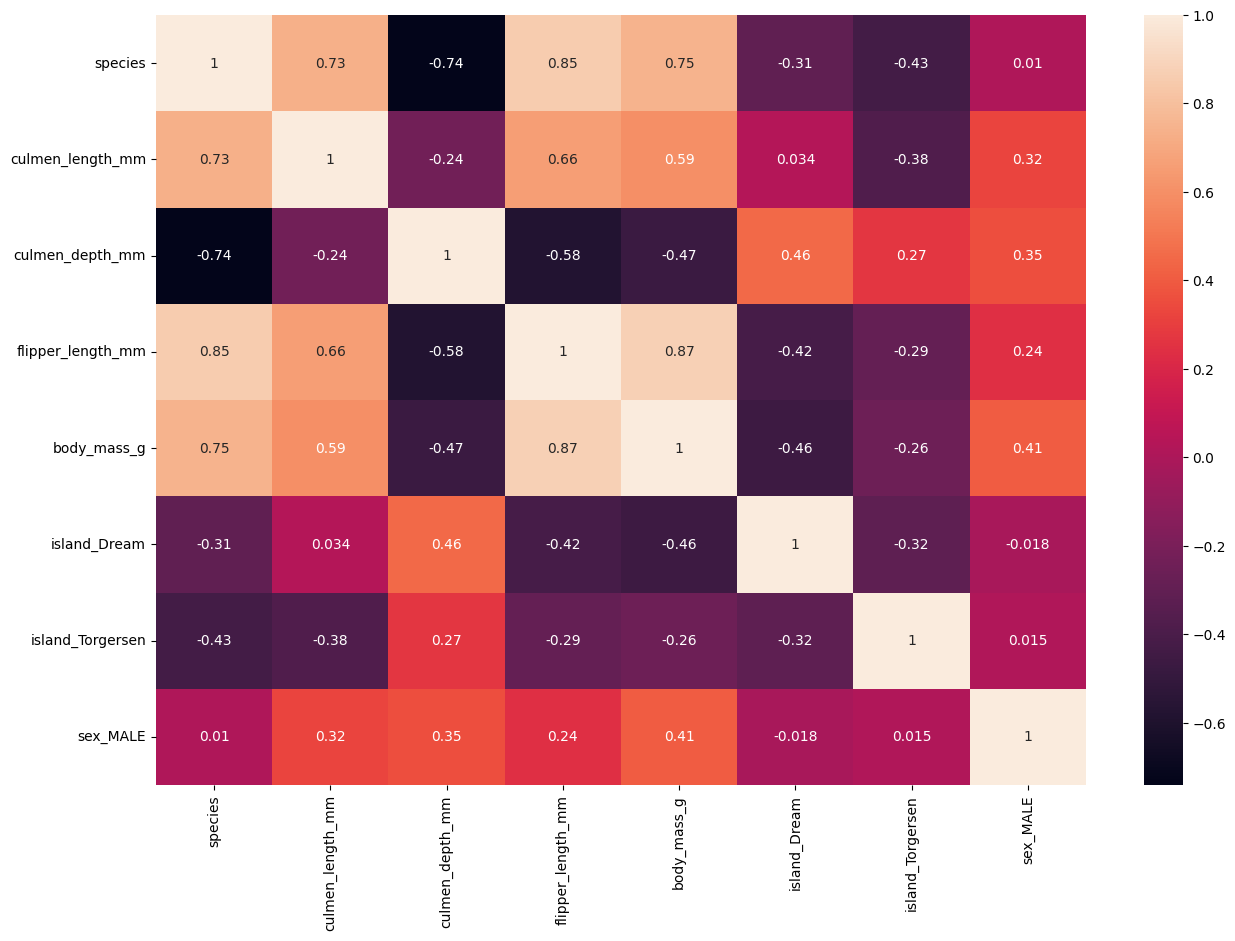

In [26]:
plt.rcParams['figure.figsize']=15,10
sns.heatmap(correlation,annot=True)
plt.show()

## Splitting data into dependent and independent variables

In [27]:
X=df4.drop(['species'],axis=1)
Y=df4.species

In [28]:
X.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10,18.7,181.0,3750.0,0,1,1
1,39.50,17.4,186.0,3800.0,0,1,0
2,40.30,18.0,195.0,3250.0,0,1,0
3,44.45,17.3,197.0,4050.0,0,1,1
4,36.70,19.3,193.0,3450.0,0,1,0
5,39.30,20.6,190.0,3650.0,0,1,1
6,38.90,17.8,181.0,3625.0,0,1,0
7,39.20,19.6,195.0,4675.0,0,1,1
8,34.10,18.1,193.0,3475.0,0,1,1
9,42.00,20.2,190.0,4250.0,0,1,1


In [29]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

## Scaling Data

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,-0.887622,0.787289,-1.420541,-0.564625,-0.750757,2.369680,0.960098
1,-0.814037,0.126114,-1.063485,-0.502010,-0.750757,2.369680,-1.041561
2,-0.666866,0.431272,-0.420786,-1.190773,-0.750757,2.369680,-1.041561
3,0.096581,0.075255,-0.277964,-0.188936,-0.750757,2.369680,0.960098
4,-1.329133,1.092447,-0.563608,-0.940314,-0.750757,2.369680,-1.041561
...,...,...,...,...,...,...,...
339,0.096581,0.075255,-0.277964,-0.188936,-0.750757,-0.421998,0.960098
340,0.528894,-1.450534,1.007436,0.812900,-0.750757,-0.421998,-1.041561
341,1.191161,-0.738500,1.507314,1.939966,-0.750757,-0.421998,0.960098
342,0.234553,-1.196236,0.793203,1.251204,-0.750757,-0.421998,-1.041561


## Splitting the data into training and testing

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [32]:
y_train.value_counts()

0    118
2     99
1     58
Name: species, dtype: int64

### Dataset is imbalanced

## Balancing the Dataset

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
x_train_balanced,y_train_balanced=sm.fit_resample(x_train,y_train)

In [34]:
y_train_balanced.value_counts()

0    118
2    118
1    118
Name: species, dtype: int64

In [35]:
print("Shape of X train data {}\nShape of Y train data {}\nShape of X test data {}\nShape of Y test data {}"
      .format(x_train_balanced.shape,y_train_balanced.shape,x_test.shape,y_test.shape))

Shape of X train data (354, 7)
Shape of Y train data (354,)
Shape of X test data (69, 7)
Shape of Y test data (69,)


## Classification Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_balanced,y_train_balanced)
print('Score of test data:',model.score(x_test,y_test))
print('Score of train data:',model.score(x_train_balanced,y_train_balanced))

Score of test data: 0.9565217391304348
Score of train data: 0.9887005649717514


## Confusion Matrix and Classification Report

In [37]:
species_dict

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

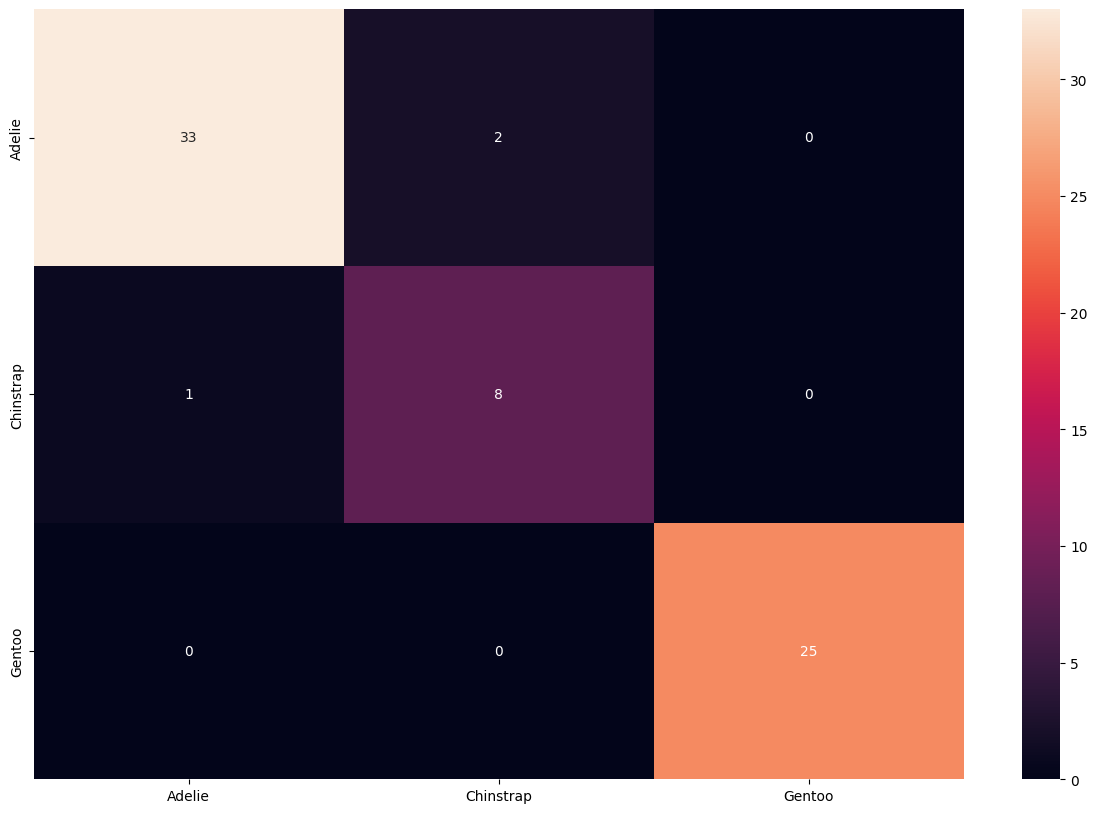

In [38]:
from sklearn.metrics import confusion_matrix
predicted=model.predict(x_test)
cm=confusion_matrix(predicted,y_test)
sns.heatmap(cm,annot=True,xticklabels=species_dict.values(),yticklabels=species_dict.values())
plt.show()

In [39]:
from sklearn.metrics import classification_report
print('Classification Report\n',classification_report(predicted,y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.80      0.89      0.84         9
           2       1.00      1.00      1.00        25

    accuracy                           0.96        69
   macro avg       0.92      0.94      0.93        69
weighted avg       0.96      0.96      0.96        69

